<a href="https://colab.research.google.com/github/KhangKagTa19/News-Classification/blob/main/Softmax_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize Politics-Society News. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.



**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.

In [ ]:
# libraries for dataset preparation, feature engineering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(123) #for reprodicible results
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 - Dataset preparation ##

**Problem Statement**:

You are given a dataset ("news_dataset.csv") containing a set of Vietnamses news labeled as politics-society (y="Chinhtrixahoi"), sport (y="Thethao) or others (y="Khac")
* Actually, "Khac" comprises of "Phap luat", "Kinh doanh", "Doi song", "The gioi" news

You will build a simple news-classification algorithm that can correctly classify news.

Let's get more familiar with the dataset. Load the data by running the following code.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_LogisticClassification/Dataset.csv')

In [ ]:
# The dataframe has two columns, text and label
df.head(10)

,text,label
0,"Trong khi đó, Indonesia với chiến thắng trước ...",Thethao
1,"Như vậy, tổng cộng Việt Nam đã bị trừ 41,06 đi...",Thethao
2,"Đến giờ, người hâm mộ bóng đá Việt Nam vẫn chư...",Thethao
3,Không có gì chán hơn là làm việc và sống giữa ...,Khac
4,Cún con chứa ma túy Cún con - nạn nhân của bọ...,Khac
5,Xây dựng tổ chức Đoàn thật sự là người bạn củ...,Chinhtrixahoi
6,Lãnh đạo Công ty Vissan: Đây là bài học đau x...,Khac
7,Giải bóng rổ vô địch Hà Nội 2023 diễn ra từ ng...,Thethao
8,"Nội dung nữ, 5 đội bóng sẽ thi đấu vòng tròn t...",Thethao
9,Ban tổ chức cho phép mỗi đội được đăng ký khôn...,Thethao


In [ ]:
size_chinhtri = df[df['label'] == 'Chinhtrixahoi'].shape[0]
size_thethao = df[df['label'] == 'Thethao'].shape[0]
size_others = df[df['label'] == 'Khac'].shape[0]
print('Number of politics-society documents: %s' %size_chinhtri)
print('Number of sport documents: %s' %size_thethao)
print('Number of other documents: %s' %size_others)

Number of politics-society documents: 198
Number of sport documents: 200
Number of other documents: 202


In [ ]:
# an example of a politics-society news
df['text'][5]

' Xây dựng tổ chức Đoàn thật sự là người bạn của thanh niên  \n (NLĐ)- Sáng 26-3, Thành đoàn TPHCM đã tổ chức trọng thể lễ mít tinh kỷ niệm 75 năm ngày thành lập Đoàn TNCS Hồ Chí Minh (26.3.1931 - 26.3.2006).  \n Các ông Nguyễn Minh Triết, Ủy viên Bộ Chính trị - Bí thư Thành ủy TP; Võ Văn Kiệt, nguyên Thủ tướng Chính phủ cùng lãnh đạo HĐND, UBND, các ban - ngành TP và 10.000 đoàn viên TNCS đã tham dự mít tinh.  \n Ông Tất Thành Cang, Bí thư Thành đoàn TPHCM, ôn lại truyền thống vẻ vang của Đoàn TNCS Hồ Chí Minh và nhấn mạnh: “Tổ chức Đoàn đang đối mặt với những khó khăn, thách thức mới. Đó là tình trạng thất nghiệp, tệ nạn xã hội; một bộ phận thanh niên thiếu rèn luyện, chậm tiến, chưa ý thức được trách nhiệm của mình đối với bản thân, gia đình và xã hội... Do vậy, mỗi cán bộ, đoàn viên hãy nỗ lực vươn lên, sống xứng đáng với danh hiệu cao quý “Đoàn viên TNCS Hồ Chí Minh”.  \n Thay mặt lãnh đạo TPHCM, bà Phạm Phương Thảo, Phó Bí thư Thành ủy, đã giao cho Thành đoàn TPHCM nhiệm vụ xây d

In [ ]:
# an example of a sport news
df['text'][2]

'Đến giờ, người hâm mộ bóng đá Việt Nam vẫn chưa hiểu tại sao trung vệ Thanh Bình lại nắm và kéo áo cầu thủ Indonesia một cách lộ liễu đến vậy. Nhất là khi đó là một tình huống trong vòng 16m50.'

Next, we will split the dataset into training and test sets so that we can train and test classifier. Also, we will encode our target column so that it can be used in our model.

In [ ]:
# split the dataset into training and test datasets
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['text'], df['label'])

# label encode the target variable, encode 3 labels
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Chinhtrixahoi" "Thethao" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Thethao","Khac"]))

["Chinhtrixahoi" "Thethao" "Khac"] labels corresponds to [0 2 1] labels


The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset.

### TF-IDF Vectors as features
TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [ ]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 450
Number of testing documents: 150
Number of features of each document: 5000
xtrain_tfidf shape: (450, 5000)
train_y shape: (450,)
xtest_tfidf shape: (150, 5000)
test_y shape: (150,)


Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise:**: For convenience, you should now transpose the training and testing numpy-array, and expand the shape of the lable arrays in the axis=0 position.

After this, our training (and test) dataset is a numpy-array where each column represents a document vector. There should be the number of training documents (respectively the number of testing documents) as the number of columns.

In [ ]:
### START CODE HERE ###
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix
xtrain_tfidf =  xtrain_tfidf.T.toarray()
xtest_tfidf =  xtest_tfidf.T.toarray()
### END CODE HERE ###

In [ ]:
# New shape
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5000, 450)
train_y shape: (1, 450)
xtest_tfidf shape: (5000, 150)
test_y shape: (1, 150)


## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish politics-society news from other news.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

**The below image is an analogy of the network architecture of an image classifier to a text classifier.**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions


The *softmax function*, invented in 1959 by the social scientist
R Duncan Luce in the context of *choice models* does precisely this.
To transform our logits such that they become nonnegative and sum to $1$,
while requiring that the model remains differentiable,
we first exponentiate each logit (ensuring non-negativity)
and then divide by their sum (ensuring that they sum to $1$).

$$
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{where}\quad
\hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.
$$

In [ ]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A



In [ ]:

#test function
print ("softmax([0 1 0 0 1 2]) = " + str(softmax(np.array([0,1,0,0,1,2]))))

softmax([0 1 0 0 1 2]) = [0.06318868 0.17176464 0.06318868 0.06318868 0.17176464 0.46690469]


In [ ]:
from scipy import sparse
def convert_labels(y, C = 3):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y


In [ ]:
label1 = convert_labels([1,2,0], )
print(label1)

[[0 0 1]
 [1 0 0]
 [0 1 0]]


### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 3)) #3 is the num of label
    b = 0.
    ### END CODE HERE ###

    assert(w.shape == (dim, 3))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0. 0.]
 [0. 0. 0.]]
b = 0.0


### Softmax and Derivatives

Since the softmax and the corresponding loss are so common,
it is worth while understanding a bit better how it is computed.
Plugging $o$ into the definition of the loss $l$
and using the definition of the softmax we obtain:

$$
l = -\sum_j y_j \log \hat{y}_j = \sum_j y_j \log \sum_k \exp(o_k) - \sum_j y_j o_j
= \log \sum_k \exp(o_k) - \sum_j y_j o_j.
$$

To understand a bit better what is going on,
consider the derivative with respect to $o$. We get

$$
\partial_{o_j} l = \frac{\exp(o_j)}{\sum_k \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j = P(y = j \mid x) - y_j.
$$

In other words, the gradient is the difference
between the probability assigned to the true class by our model,
as expressed by the probability $P(y \mid x)$,
and what actually happened, as expressed by $y$.
In this sense, it is very similar to what we saw in regression,
where the gradient was the difference
between the observation $y$ and estimate $\hat{y}$. This is not coincidence.
In any [exponential family](https://en.wikipedia.org/wiki/Exponential_family) model,
the gradients of the log-likelihood are given by precisely this term.
This fact makes computing gradients easy in practice.
### Cross-Entropy Loss

Now consider the case where we observe not just a single outcome
but an entire distribution over outcomes.
We can use the same representation as before for $y$.
The only difference is that rather than a vector containing only binary entries,
say $(0, 0, 1)$, we now have a generic probability vector, say $(0.1, 0.2, 0.7)$.
The math that we used previously to define the loss $l$ still works out fine,
just that the interpretation is slightly more general.
It is the expected value of the loss for a distribution over labels.

$$
l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_j y_j \log \hat{y}_j.
$$

This loss is called the cross-entropy loss and it is
one of the most commonly used losses for multiclass classification.
We can demystify the name by introducing the basics of information theory.

In [ ]:

# GRADED FUNCTION: propagate
def compute_cost(A, Y):
    return -np.sum(Y*np.log10(A))

def grad(X, A, Y):
    E = A - Y

    return X.dot(E.T)

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    one_hot_vector = convert_labels(Y, )


    # FORWARD PROPAGATION (FROM X TO COST)
    Z = np.dot(w.T, X) + b
    A = softmax(Z)  # compute activation

    # COST FUNCTION
    cost = compute_cost(A, one_hot_vector)

    # BACKWARD PROPAGATION (TO FIND GRADIENTS)

    dw = grad(X, A, one_hot_vector)


    # Reshape dw to match the shape of w
    dw = dw.reshape(w.shape)

    grads = {"dw": dw, "db": 0}

    return grads, cost

In [ ]:
# Given data
L = 3  # Number of classes
X1 = np.array([[2],[1]])


# Assuming you have weights w and bias b properly initialized
# Initialize w and b with the correct shapes
# Specify weights
W1 = np.array([0.2, 0.7])
W2 = np.array([0.8, 0.4])
W3 = np.array([0.3, 0.3])
b=0
# Combine weights into a matrix W with the correct shape
w = np.vstack([W1, W2, W3]).T  # Transpose to have the correct shape

# w, b = initialize_with_zeros(X1.shape[0])
# Reshape X1 to be a column vector



# Convert Y1 to one-hot encoded matrix
Y1=[1]
# Forward propagation and compute cost using the propagate function
grads1, cost1 = propagate(w, b, X1, Y1)

print("Cost for X1:", cost1)



Cost for X1: 0.24040963846679836


### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector, of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
print(X1.shape)
print(Y1)

params, grads, costs = optimize(w, b, X1, Y1, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

(2, 1)
[1]
w = [[-0.02676149  1.22077943  0.10598206]
 [ 0.58661925  0.61038971  0.20299103]]
b = 0.0
dw = [[ 0.14095025 -0.26615014  0.12519988]
 [ 0.07047513 -0.13307507  0.06259994]]
db = 0


**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = softmax(w^T X + b)$

2. The index of the argmax of probability will be the label for that X

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    Z = np.dot(w.T, X) + b
    A = softmax(Z)  # compute activation
    return np.argmax(A, axis = 0), A


In [ ]:

# Make a prediction
predicted_classes, A = predict(params["w"], params["b"], X1)

# Print the results
print("Predicted Classes:")
print(predicted_classes)
print("Softmax Output:")
print(A)

Predicted Classes:
[1]
Softmax Output:
[[0.06991584]
 [0.867959  ]
 [0.06212516]]


**Expected Output**:

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            1
         </td>  
   </tr>

</table>


## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [ ]:
# GRADED FUNCTION: model
import numpy as np
from keras.utils import to_categorical

def model(X_train, Y_train, X_test, Y_test, tol=1e-4, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    X = X_train
    Y_train = Y_train
    W, b = initialize_with_zeros(X_train.shape[0])  # Assuming initialize_with_zeros is implemented correctly
    C = W.shape[1]
    N = X.shape[1]
    d = X.shape[1]

    costs = []  # Initialize costs list

    ### START CODE HERE ###
    count = 0
    check_w_after = 20
    while count < num_iterations:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(-1,1)
            yi = Y_train[:, i]

            grads, cost = propagate(W, b, xi, yi)

            dw = grads["dw"]
            db = grads["db"]
            W = W - learning_rate * dw
            b = b - learning_rate * db
            if i % 100 == 0:
                costs.append(cost)
            if print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        count += 1

    # Predict test/train set examples
    Y_prediction_test = predict(W, b, X_test)[0]
    Y_prediction_train = predict(W, b, X_train)[0]

    # Print train/test Errors
    train_accuracy = np.mean(Y_prediction_train == Y_train) * 100
    test_accuracy = np.mean(Y_prediction_test == Y_test) * 100
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": W,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d


Run the following cell to train your model.

In [ ]:
d = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 100, learning_rate = .5, print_cost = True)

Cost after iteration 200: 0.420942
Cost after iteration 300: 0.194470
Cost after iteration 400: 0.347466
Cost after iteration 100: 0.260340
Cost after iteration 0: 0.534059
Cost after iteration 200: 0.211118
Cost after iteration 400: 0.292377
Cost after iteration 100: 0.161311
Cost after iteration 0: 0.343676
Cost after iteration 300: 0.144117
Cost after iteration 0: 0.259876
Cost after iteration 200: 0.099516
Cost after iteration 400: 0.180868
Cost after iteration 100: 0.100896
Cost after iteration 300: 0.119157
Cost after iteration 0: 0.162692
Cost after iteration 100: 0.058674
Cost after iteration 400: 0.122887
Cost after iteration 200: 0.068596
Cost after iteration 300: 0.070171
Cost after iteration 300: 0.072112
Cost after iteration 0: 0.143464
Cost after iteration 200: 0.057366
Cost after iteration 100: 0.048534
Cost after iteration 400: 0.115418
Cost after iteration 0: 0.107646
Cost after iteration 100: 0.037013
Cost after iteration 200: 0.042540
Cost after iteration 400: 0.1062

**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is around 84%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. You'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

Let's also plot the cost function and the gradients.

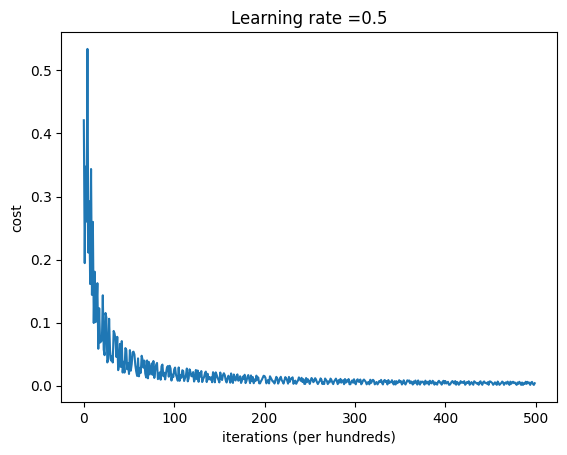

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first text classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.05
train accuracy: 100.0 %
test accuracy: 86.0 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 100.0 %
test accuracy: 86.0 %

-------------------------------------------------------

learning rate is: 0.5
train accuracy: 100.0 %
test accuracy: 85.33333333333334 %

-------------------------------------------------------



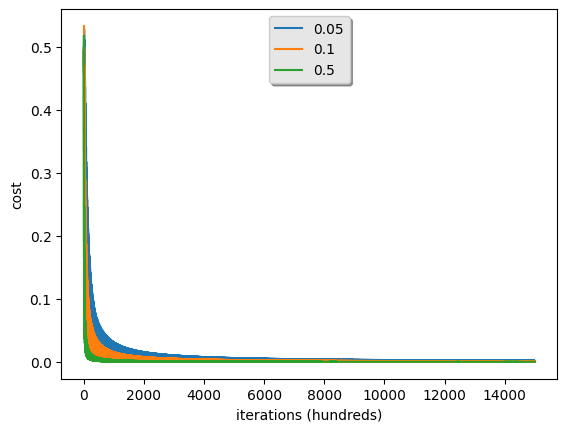

In [ ]:
learning_rates = [0.05, 0.1, 0.5]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 3000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large, the cost may oscillate up and down. It may even diverge (though in this example, using 0.5 does not have that problem and still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.)


## 7 - Test with your own news (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own text and see the output of your model.

["Chinhtrixahoi" "Thethao" "Khac"] labels corresponds to [0 2 1] labels

In [ ]:
text = """Làm mẹ khi quá trẻ dễ bị loãng xương
Những cô gái mới lớn mang thai sẽ gia tăng nguy cơ xương bị yếu đi. Trong một nghiên cứu mới tại Mỹ, 1/3 số bà mẹ ở tuổi thiếu niên có chỉ số điển hình của bệnh loãng xương, hoặc có dấu hiệu báo trước căn bệnh này.
"Cần phải đảm bảo rằng những bà mẹ thiếu niên tiêu thụ đủ lượng canxi trong thời gian mang thai - 1.300 milligram mỗi ngày, để đáp ứng nhu cầu canxi của cả mẹ lẫn bào thai", Kimberly O. O'Brien tại Trường sức khoẻ cộng đồng Johns Hopkins Bloomberg ở Baltimore, phát biểu.
Canxi đặc biệt cần thiết trong thời kỳ mang thai do bào thai khi lớn lên cần nhiều chất dinh dưỡng để hình thành xương, trong lúc bản thân các thiếu nữ cũng cần nhiều canxi cho chính mình. Thực tế, 40% lượng xương của con gái được hình thành trong độ tuổi dậy thì.
Mặc dù có hơn nửa triệu thiếu nữ sinh con tại Mỹ mỗi năm, chưa có nhiều thông tin về việc mang thai ảnh hưởng thế nào tới xương của người mẹ. O'Brien và cộng sự đã nghiên cứu 23 cô gái mang thai trong độ tuổi 13,5 đến 18,3. Cũng giống như người lớn, lượng tiêu thụ canxi trong thời kỳ mang thai của các cô gái trẻ cao hơn là sau khi sinh.
Khoảng 1/3 các bà mẹ trẻ có dấu hiệu xương mỏng đi đáng kể sau khi sinh. Trong số 15 em được đo xương trong 3-4 tháng sau khi sinh, 2 em có đủ dấu hiệu của bệnh loãng xương. 3 em khác có dấu hiệu của tiền loãng xương.
Tuy vậy, không phải cứ mang thai ở độ tuổi thiếu niên là có xương bị yếu đi. Kết quả nghiên cứu chỉ ra rằng tiêu thụ nhiều lượng canxi hơn trong thời kỳ mang thai sẽ giúp chống lại tình trạng yếu xương.
"""

x_tfidf =  tfidf_vect.transform([text]).T.toarray()

In [ ]:
predict(d["w"], d["b"], x_tfidf)

(array([1]),
 array([[0.13478959],
        [0.81421456],
        [0.05099585]]))

In [ ]:
text = """Liverpool vừa vào chung kết Cup Liên đoàn Anh gặp Chelsea, và đang giữ đỉnh bảng Ngoại hạng Anh, vẫn còn khả năng ăn bốn danh hiệu. Vì thế, quyết định của ông gây ngỡ ngàng. Nhưng HLV người Đức cho biết ông đã nói chuyện với giới chủ Liverpool từ tháng 11/2023. Và quyết định này không liên quan gì đến sức khỏe của ông.
"""

x_tfidf =  tfidf_vect.transform([text]).T.toarray()

In [ ]:
predict(d["w"], d["b"], x_tfidf)

(array([2]),
 array([[0.00409019],
        [0.20098161],
        [0.7949282 ]]))

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings
    - Try others parameters of TfidfVectorizer, such as ngrams, lowercase
    - See what features are in a Tf-idf vector
    - Test with different feature representation other than Tf-idf

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c